### Multivariate Time Series

**Multivariate Time Series(다변량 시계열)** 은 각 시간 단위마다 여러개의 값을 가지는 시계열을 의미한다. 거시경제분석, Pair Trading 등의 분야에서 많이 사용된다

#### 1. Vector Process

**1.1 Weak Stationarity and Cross-Correlation Matrices**

k-dimensional time series $\mathbf{r} _t = [r_{1t}, \cdots, r_{kt}]^{'}$를 고려하자. 이들의 first, second moment가 시간에 영향을 받지 않는 시계열이면 weakly stationary하다고 한다. 특히, weakly stationary한 시계열의 Covariance matrix와 mean vector는 Constant 하다.
Weakly stationary time series $\mathbf{r} _t$가 있을 때, mean vector는
$$\mathbf{μ} = E(\mathbf{r} _t)$$
이고, Covariance matrix는
$$\mathbf{Γ} _0 = E[(\mathbf{r} _t - \mathbf{μ})(\mathbf{r} _t - \mathbf{μ})^{'}]$$
이다. 여기서 기대값은 $\mathbf{r} _t$의 joint distribution에서 추정된 것이다

#### exercise 1

pandas datareader로부터 데이터를 가져와 mean vector와 covariance matrix를 생성해 보자

In [1]:
import pandas_datareader as pdr
import datetime
import numpy as np
import pandas as pd

start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

samsung = pdr.DataReader("005930", "naver", start_date, end_date).astype(int)
kakao = pdr.DataReader("035720", "naver", start_date, end_date).astype(int)
hynics = pdr.DataReader("000660", "naver", start_date, end_date).astype(int)
LG = pdr.DataReader("003550", "naver", start_date, end_date).astype(int)

각 종목별 수익률을 계산해 줘야 한다

In [2]:
ret_samsung = (np.log(samsung.Close) - np.log(samsung.Close.shift())).dropna()
ret_kakao = (np.log(kakao.Close) - np.log(kakao.Close.shift())).dropna()
ret_hynics = (np.log(hynics.Close) - np.log(hynics.Close.shift())).dropna()
ret_LG = (np.log(LG.Close) - np.log(LG.Close.shift())).dropna()

수익률이 계산되었으면, 하나의 Data Frame으로 결합해야 한다

In [3]:
matrix = pd.concat([ret_samsung, ret_kakao, ret_hynics, ret_LG], axis = 1)
matrix.columns = ['Samsung','Kakao','Hynics','LG']
matrix

,Samsung,Kakao,Hynics,LG
Date,,,,
2022-01-04,0.001271,-0.026550,0.000000,0.017136
2022-01-05,-0.016656,-0.055314,-0.023623,-0.012210
2022-01-06,-0.006481,-0.053541,-0.003992,-0.007398
2022-01-07,0.018042,0.000000,0.015873,0.009852
2022-01-10,-0.003839,-0.034591,-0.019881,-0.009852
...,...,...,...,...
2022-12-23,-0.017065,-0.031339,-0.017835,0.019681
2022-12-26,-0.003448,0.003738,-0.010336,-0.008563
2022-12-27,0.003448,0.014815,0.000000,0.006124


`mean()` method에서 axis를 0으로 지정하여 계산하면 각 종목별 평균 수익률을 계산할 수 있다

In [4]:
matrix.mean(axis = 0)

Samsung   -0.001435
Kakao     -0.003136
Hynics    -0.002198
LG        -0.000149
dtype: float64

`cov()` method를 사용하면 DataFrame의 Covariance를 계산할 수 있다

In [5]:
matrix.cov()

,Samsung,Kakao,Hynics,LG
Samsung,0.000205,0.000189,0.000212,0.000126
Kakao,0.000189,0.000723,0.000236,0.000162
Hynics,0.000212,0.000236,0.000439,0.000149
LG,0.000126,0.000162,0.000149,0.000287


seaborn library에서 `heatmap()` 함수를 이용하면 시각화를 할 수 있다

<Axes: >

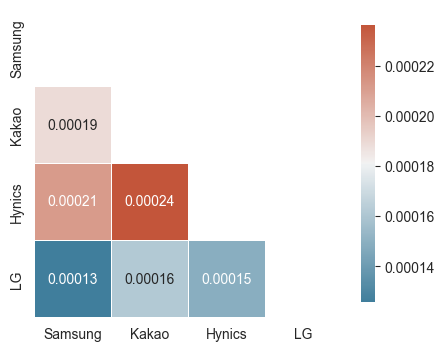

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(matrix.cov(), dtype = bool))
f, ax = plt.subplots(figsize = (5, 4))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
plt.grid(False)
sns.heatmap(matrix.cov(), mask = mask, cmap = cmap,
            square = True, linewidths = .5, cbar_kws = {"shrink": .9}, annot = True)

**1.2 Cross-Correlation**

행렬 $\mathbf{D}$를 $k \times k$ 크기의 대각행렬이라 가정하자. 즉, $\mathbf{D} = \mbox{diag}\{\sqrt{\Gamma_{11}(0)},\cdots,\sqrt{\Gamma_{kk}(0)}\}$이다. 다변량 수익률 행렬$\mathbf{r} _t$의 concurrent하고, lag가 0인 cross correlation matrix는 다음과 같이 정의된다

$$\mathbf{ρ}_0 = [\rho_{ij}(0)] = \mathbf{D^{-1}\Gamma_0D^{-1}}$$

여기서 행렬 $\mathbf{\rho}_0$의 $(i,j)$번째 원소는 다음과 같이 정의된다

$$\rho_{ij}(0) = \frac{ Γ_{ij}(0) }{\sqrt{Γ_{ii}(0) Γ_{jj}(0)}} = \frac{\mathrm{Cov(r_{it}, r_{jt})}}{\mathrm{std}(r_{it}) \mathrm{std}(r_{jt})}$$

이는 $r_{it}$와 $r_{jt}$ 사이의 correlation coefficient이기도 하다. 한편, multivariate time seires 분석에서 가장 중요한 주제는 바로 시계열간의 lead-lag relationship이다. cross-correlation matrices는 각 시계열들이 얼마나 선형 의존적(linear dependence)인지 측정하는 지표로 사용된다. 시차가 $l$인 cross covariance matrix는

$$\mathbf{Γ}_l = [Γ_{ij}(l)] = E[(\mathbf{r} _t - \mathbf{μ})(\mathbf{r} _{t-l} - \mathbf{μ})^{'}]$$
인데, cross-correlation matrix와는 다음과 같은 관계가 성립한다

$$\mathbf{ρ}_l = [\rho_{ij}(l)] = \mathbf{D^{-1}Γ_lD^{-1}}$$

정의에 의해,

$$\rho_{ij}(l) = \frac{Γ_{ij}(l)}{\sqrt{ Γ_{ii}(0)Γ_{jj}(0) }} = \frac{\mathrm{Cov}(r_{it}, r_{j,t-l})}{\mathrm{std}(r_{it})\mathrm{std}(r_{jt})}$$

한편, 조건부 수익률 $\{\mathbf{r}_t|t=1,\cdots,T\}$에서의 Sample Cross-Correlation Matrix는 다음과 같이 추정된다

$$\mathbf{\hat\Gamma}_l = \frac{1}{T}\sum_{t=l+1}^T (\mathbf{r} _t - \mathbf{\bar r})(\mathbf{r} _{t-l} - \mathbf{\bar r})^{'}, ~~~~~ l \geq 0$$

여기서 $\mathbf{\bar r} = \frac{\sum_{t=1}^T \mathbf{r}_t}{T}$ 은 vector of sample mean이다. sample cross-correlation matrix는 동일한 논리로 다음과 같이 추정된다

$$\mathbf{\hat \rho}_l = \mathbf{\hat D^{-1} \hat Γ_l \hat D^{-1}}, ~~~~~ l \geq 0$$

#### example 2

example 1에서 구한 종목 수익률 행렬에서 correlation matrix를 구해 보자

pandas DataFrame에서 `corr()` method를 사용하면 correlation matrix를 구할 수 있다

In [7]:
matrix.corr()

,Samsung,Kakao,Hynics,LG
Samsung,1.000000,0.491056,0.705545,0.518667
Kakao,0.491056,1.000000,0.419612,0.354378
Hynics,0.705545,0.419612,1.000000,0.419940
LG,0.518667,0.354378,0.419940,1.000000


마찬가지로 seaborn의 `heatmap()` 함수를 사용하여 시각화를 할 수 있다

<Axes: >

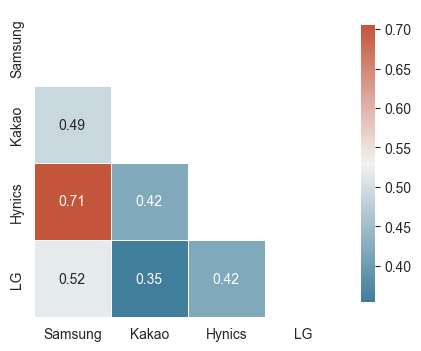

In [8]:
mask = np.triu(np.ones_like(matrix.cov(), dtype = bool))
f, ax = plt.subplots(figsize = (5, 4))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
plt.grid(False)
sns.heatmap(matrix.corr(), mask = mask, cmap = cmap,
            square = True, linewidths = .5, cbar_kws = {"shrink": .9}, annot = True)

seaborn 라이브러리의 `pairplot()` 함수를 사용하면 다음과 같이 cross-correlation plot을 그릴 수 있다

/Users/tommylee/Desktop/Pycharm/QUANTIFI/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


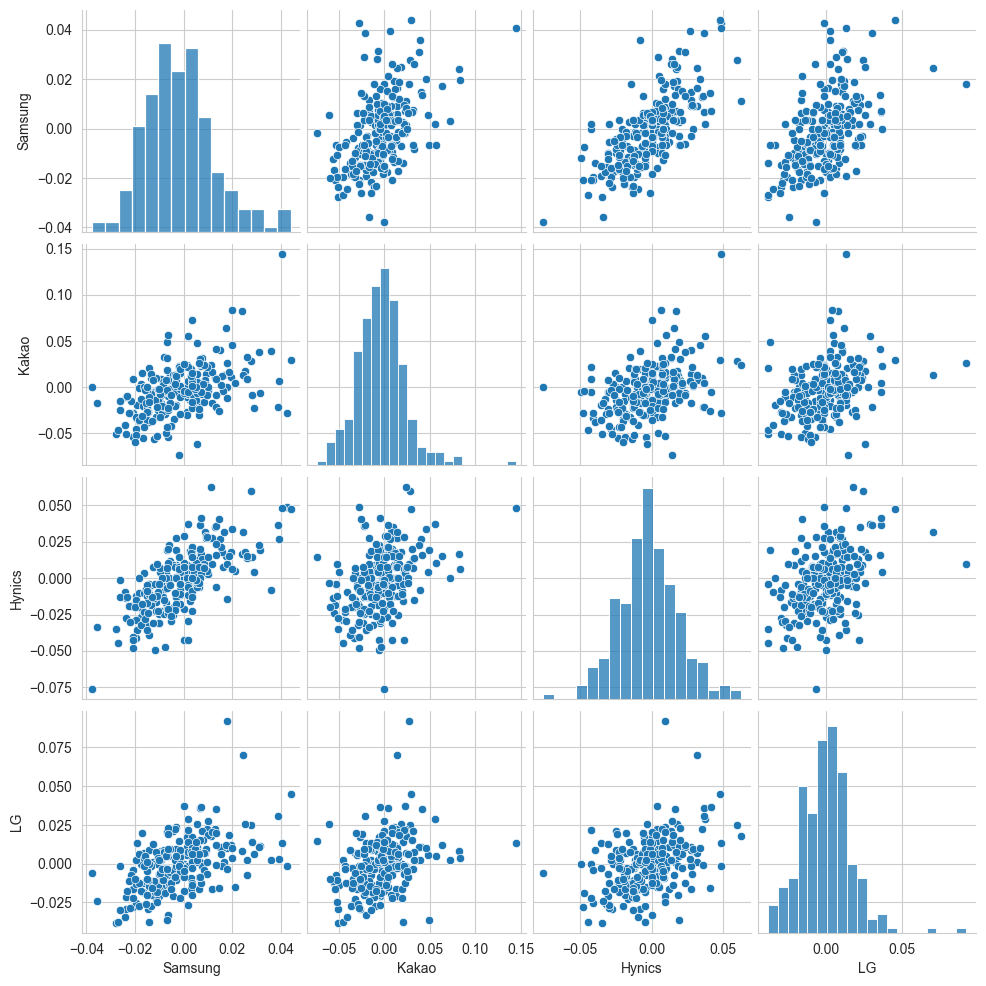

In [9]:
sns.pairplot(matrix)
plt.show()

**1.3 Vector Autoregressive models**

multivairate time seires가 $\mathrm{VAR(1)}$ 모형을 따른다고 하자

$$\mathbf{r}_t = \mathbf{ϕ}_0 + \mathbf{Φr}_{t-1} + \mathbf{a}_t$$

$k=2$일 때 $\mathrm{VAR(1)}$ 모형은 다음 식을 따른다

$$r_{1t} = ϕ_{10} + ϕ_{11}r_{1,t-1} + ϕ_{12}r_{2,t-1} + a_{1t}$$
$$r_{2t} = ϕ_{20} + ϕ_{21}r_{1,t-1} + ϕ_{22}r_{2,t-1} + a_{2t}$$

**1.4 Stationarity Condition and Moments of a VAR(1) Model**

약정상성을 띄는 $\mathrm{VAR(1)}$을 고려하자. 여기서 오차항의 평균은 $E(\mathbf{a}_t) = \mathbf{0}$이다. 여기서 다음 식을 얻을 수 있다

$$E(\mathbf{r}_t) = \mathbf{\phi}_0 + \mathbf{\Phi}E(\mathbf{r}_{t-1})$$

$E(\mathbf{r}_t)$는 시간에 영향을 받지 않기 때문에, 다음과 같은 식을 알 수 있다

$$\mathbf{\mu} = E(\mathbf{r}_t) = (\mathbf{I} - \mathbf{\Phi})^{-1}\mathbf{\Phi}_0$$

$\mathbf{I-\Phi}$은 가역적이고, 여기서 $\mathbf{I}$는 $k \times k$의 항등행렬이다. $\mathbf{\phi}_0 = (\mathbf{I} - \mathbf{\Phi})\mathbf{\mu}$를 이용해, $\mathrm{VAR(1)}$모형은 다음과 같이 쓸 수 있다

$$(\mathbf{r_t} - \mathbf{\mu}) = \mathbf{\Phi}(\mathbf{r_{t-1}} - \mathbf{\mu})+\mathbf{a}_t$$

$\mathbf{\tilde r_t}(\mathbf{r_t} - \mathbf{\mu})$는 mean corrected time series이다. 이를 이용해 $\mathrm{VAR(1)}$ 모형을 다시 쓰면

$$\mathbf{\tilde r}_t = \mathbf{\Phi}\mathbf{ \tilde r}_{t-1} -\mathbf{a}_t$$

이다. 한편, 이 모형을 오차항에 대해서 다시 쓸 수 있는데, VAR(1) 모형은 VMA(q) 모형으로 바꿀 수 있다

$$\mathbf{\tilde r}_t = \mathbf{a}_t + \mathbf{\Phi}\mathbf{a}_{t-1} + \mathbf{\Phi}^2 \mathbf{a}_{t-2} + \mathbf{\Phi}^3 \mathbf{a}_{t-3} + \cdots$$

이는 VAR(1) process의 몇가지 특성을 보여주고 있다
1. $\mathbf{a}_t$는 시계열적으로 uncorrelate하기 때문에, $\mathrm{Cov}(\mathbf{a}_t, \mathbf{r}_{t-1}) = \mathbf{0}$이다
2. 적절한 변환을 취하여 생성한 공분산 $\mathrm{Cov}(\mathbf{r}_t, \mathbf{a}_t) = \mathbf{\Sigma}$이 존재한다
3. $\mathbf{r}_t$는 codfficient matrix $\mathbf{\Phi}^j$의 과거 오차 $\mathbf{a}_{t-j}$에 의존한다
4. Covariance matirx는 다음과 같다
$$\mathrm{Cov}(\mathbf{r}_t) = \mathbf{\Gamma}_0 = \mathbf{\Sigma} + \mathbf{\Phi}\mathbf{\Sigma}\mathbf{\Phi}^{'} + \mathbf{\Phi}^2\mathbf{\Sigma}(\mathbf{\Phi}^2)^{'} + \cdots = \sum_{i=0}^{\infty} \mathbf{\Phi}^i \mathbf{\Sigma}(\mathbf{\Phi}^i)^{'}$$

위 식에 $\mathbf{\tilde r^{'}_{t-l}}$을 곱한 뒤 평균을 구하고, 공분산을 계산하면 $\mathrm{Cov}(\mathbf{a}_t, \mathbf{r}_{t-j}) = E(\mathbf{a}_t \mathbf{\tilde r}^{'}_{t-j}) = \mathbf{0} ~~ \mbox{for} ~~ j>0$이다. 이를 통해 우리는 아래 식을 구할 수 있다

$$E(\mathbf{\tilde r_t \tilde r_{t-l}^{'}}) = \mathbf{\Phi} E(\mathbf{\tilde r_{t-1} \tilde r_{t-l}})^{'}, ~~~~~ l > 0$$

그러므로

$$\mathbf{\Gamma}_l = \mathbf{\Phi\Gamma}_{l-1}, ~~~~~ l>0$$

이다. 오른쪽 식의 행렬 앞 뒤로 $\mathbf{D}^{-1/2}$를 곱하면, 다음과 같이 Cross Correlation Matrix를 구할 수 있다

$$\mathbf{\rho}_l = \mathbf{\Upsilon}^l\mathbf{\rho}_{l-1}$$

**1.5 Vector AR(p) Models**

$\mathrm{VAR(1)}$ 모형을 일반화하면 다음과 같이 $\mathrm{VAR}(p)$ 모형으로 표현 가능하다

$$\mathbf{r}_t = \mathbf{\phi}_0 + \mathbf{\Phi}_1\mathbf{r}_{t-1} + ⋯ + \mathbf{Φ}_p \mathbf{r}_{t-p} + \mathbf{a}_t, ~~~~~ p>0$$

만약 시계열 $\mathbf{r}_t$가 weakly stationary 하다면,
$$\mathbf{μ} = E(\mathbf{r}_t) = (\mathbf{I} - \mathbf{\Phi}_1 - ⋯ - \mathbf{Φ}_p)^{-1}\mathbf{\phi}_0 = [\mathbf{Φ}(1)]^{-1}\mathbf{\phi}_0$$
이다. $\mathbf{\tilde r}_t = \mathbf{r}_t - \mathbf{μ}$이라고 하자. 그러면 $\mathrm{VAR}(p)$모형은 다음과 같이 표현할 수 있다

$$\mathbf{\tilde r}_t = \mathbf{Φ}_1 \mathbf{\tilde r}_{t-1} + ⋯ + \mathbf{Φ}_p \mathbf{\tilde r}_{t-p} + \mathbf{a}_t$$

CCM의 정의에 따라, moment equation은
$$\mathbf{ρ}_l = \mathbf{Υ}_1 \mathbf{ρ}_{l-1} + ⋯ + \mathbf{Υ}_p \mathbf{ρ}_{l-p}, ~~~~ \mbox{for  } l>0$$

#### example 3

2018년 1월부터 2023년 6월까지의 KOSPI Index와 Samsung electronics의 월별 수익률을 이용하여 $\mathrm{VAR}(1)$ 모형을 추정하라

Finance DataReader와 Pandas DataReader 라이브러리를 활용하여 삼성전자 주식 종가와 KOSPI 인덱스를 가져온다

In [10]:
import FinanceDataReader as fdr

start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2023, 7, 1)

samsung = pdr.DataReader("005930", "naver", start_date, end_date).astype(int)
kospi = fdr.DataReader('KS11',  start_date, end_date).astype(int)

월별 종가로 수정해 준다

In [11]:
samsung_mon = samsung.resample('M').last()
kospi_mon = kospi.resample('M').last()

월별 수익률을 계산해 준다

In [12]:
kospi_mon_ret = (np.log(kospi_mon.Close) - np.log(kospi_mon.Close.shift(1))).dropna()
samsung_mon_ret = (np.log(samsung_mon.Close) - np.log(samsung_mon.Close.shift(1))).dropna()

VAR(1) 모형을 추정하기 위해, 하나의 DataFrame으로 만들어 주는 것이 필요하다

In [13]:
matrix_mon = pd.concat([kospi_mon_ret,samsung_mon_ret], axis = 1)
matrix_mon.columns = ['KOSPI','Samsung']
matrix_mon

,KOSPI,Samsung
Date,,
2013-08-31,0.006421,0.066490
2013-09-30,0.035994,-0.000731
2013-10-31,0.016454,0.069237
2013-11-30,0.007254,0.019602
2013-12-31,-0.016533,-0.085188
...,...,...
2023-02-28,-0.005056,-0.006579
2023-03-31,0.026183,0.054588
2023-04-30,0.009911,0.023167


statsmodel의 `VAR()`함수를 사용하면 VAR 모형을 추정할 수 있다

In [14]:
from statsmodels.tsa.api import VAR

model = VAR(matrix_mon)
results = model.fit(1, trend = 'c')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, Jul, 2023
Time:                     01:30:44
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.1278
Nobs:                     118.000    HQIC:                  -12.2115
Log likelihood:           394.982    FPE:                4.69672e-06
AIC:                     -12.2687    Det(Omega_mle):     4.46671e-06
--------------------------------------------------------------------
Results for equation KOSPI
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.001916         0.004255            0.450           0.652
L1.KOSPI          -0.233987         0.135575           -1.726           0.084
L1.Samsung         0.126302         0.091471            1.381           

`smvar()` 함수를 사용하면, information criterion을 기준으로 가장 적합한 모형을 자동으로 설계해 준다

In [15]:
import statsmodels.tsa.vector_ar.var_model as smvar
# Automatic VAR estimation
model_sm = smvar.VAR(matrix_mon)
results_smvar = model.fit(maxlags = 4, method = 'ols', ic = 'bic', trend = 'c', verbose = False)

In [16]:
results_smvar.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, Jul, 2023
Time:                     01:30:44
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.2595
Nobs:                     119.000    HQIC:                  -12.2872
Log likelihood:           396.509    FPE:                4.52378e-06
AIC:                     -12.3062    Det(Omega_mle):     4.44869e-06
--------------------------------------------------------------------
Results for equation KOSPI
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.002458         0.004196            0.586           0.558

Results for equation Samsung
           coefficient       std. error           t-stat            prob
--------------------------------------------------------------